# 資料清理

In [1]:
import yfinance as yf
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.momentum import StochasticOscillator

# 獲取台積電股票的歷史數據
df = yf.Ticker("2880.TW").history(period="max")

# 計算技術指標
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")

df.info()


C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5329 entries, 2001-12-20 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5329 non-null   float64
 1   High                       5329 non-null   float64
 2   Low                        5329 non-null   float64
 3   Close                      5329 non-null   float64
 4   Volume                     5329 non-null   int64  
 5   Dividends                  5329 non-null   float64
 6   Stock Splits               5329 non-null   float64
 7   volume_adi                 5329 non-null   float64
 8   volume_obv                 5329 non-null   int64  
 9   volume_cmf                 5310 non-null   float64
 10  volume_fi                  5316 non-null   float64
 11  volume_em                  5256 non-null   float64
 12  volume_sma_em              4672 non-null   float64
 13  

In [2]:
# 選擇要保留的指標
selected_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']

# 刪除其他指標
df = df[selected_columns]

# 打印結果
print(df)

                                Open       High        Low      Close   
Date                                                                    
2001-12-20 00:00:00+08:00   3.491763   3.508313   3.260083   3.475215  \
2001-12-21 00:00:00+08:00   3.409022   3.442119   3.260083   3.260083   
2001-12-24 00:00:00+08:00   3.326278   3.342828   3.226986   3.226986   
2001-12-25 00:00:00+08:00   3.243533   3.409021   3.243533   3.392472   
2001-12-26 00:00:00+08:00   3.309728   3.442119   3.309728   3.342827   
...                              ...        ...        ...        ...   
2023-05-29 00:00:00+08:00  22.250000  22.350000  22.200001  22.200001   
2023-05-30 00:00:00+08:00  22.200001  22.400000  22.150000  22.250000   
2023-05-31 00:00:00+08:00  22.350000  22.400000  22.200001  22.250000   
2023-06-01 00:00:00+08:00  22.200001  22.350000  22.100000  22.200001   
2023-06-02 00:00:00+08:00  22.200001  22.400000  22.200001  22.299999   

                              Volume  trend_macd_d

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5329 entries, 2001-12-20 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             5329 non-null   float64
 1   High             5329 non-null   float64
 2   Low              5329 non-null   float64
 3   Close            5329 non-null   float64
 4   Volume           5329 non-null   int64  
 5   trend_macd_diff  5296 non-null   float64
 6   trend_ema_fast   5318 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 333.1 KB


In [4]:
# 將索引視為日期欄位
df['Date'] = df.index

# 將"Date"欄位移至第一欄
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']]


# 計算KD值
KD = ta.momentum.StochasticOscillator(
    close=df['Close'],
    high=df['High'],
    low=df['Low'],
    window=14,
    smooth_window=3,
    fillna=False
)
df['KD'] = KD.stoch()  # 取得KD值的陣列

# 使用ta套件中的RSIIndicator指標計算RSI值
rsi = ta.momentum.RSIIndicator(
    close=df['Close'],
    window=14,
    fillna=False
).rsi()

# 將計算出的RSI值合併到原始DataFrame中
df['RSI'] = rsi

# 過濾出2022年到2023年2月的資料
start_date = '2022-01-01'
end_date = '2023-02-28'
dfmodel = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]




df = df.round(3) 

df = df.reset_index(drop=True)

print(dfmodel)

                                               Date       Open       High   
Date                                                                        
2022-01-03 00:00:00+08:00 2022-01-03 00:00:00+08:00  19.870558  19.917313  \
2022-01-04 00:00:00+08:00 2022-01-04 00:00:00+08:00  19.683544  19.730297   
2022-01-05 00:00:00+08:00 2022-01-05 00:00:00+08:00  19.683543  19.823805   
2022-01-06 00:00:00+08:00 2022-01-06 00:00:00+08:00  19.777050  19.917315   
2022-01-07 00:00:00+08:00 2022-01-07 00:00:00+08:00  19.964067  20.291347   
...                                             ...        ...        ...   
2023-02-20 00:00:00+08:00 2023-02-20 00:00:00+08:00  22.900000  23.049999   
2023-02-21 00:00:00+08:00 2023-02-21 00:00:00+08:00  22.900000  22.900000   
2023-02-22 00:00:00+08:00 2023-02-22 00:00:00+08:00  22.799999  22.950001   
2023-02-23 00:00:00+08:00 2023-02-23 00:00:00+08:00  22.950001  23.100000   
2023-02-24 00:00:00+08:00 2023-02-24 00:00:00+08:00  22.950001  23.000000   

In [5]:
dfmodel.tail(60)

,Date,Open,High,Low,Close,Volume,trend_macd_diff,trend_ema_fast,KD,RSI
Date,,,,,,,,,,
2022-11-22 00:00:00+08:00,2022-11-22 00:00:00+08:00,21.850000,21.950001,21.650000,21.950001,4850088,0.059390,21.814244,72.222240,54.742786
2022-11-23 00:00:00+08:00,2022-11-23 00:00:00+08:00,22.000000,22.200001,21.900000,22.000000,6419441,0.052320,21.842822,74.999974,55.570454
2022-11-24 00:00:00+08:00,2022-11-24 00:00:00+08:00,22.250000,22.350000,22.100000,22.350000,9882417,0.066819,21.920849,92.592566,60.953634
2022-11-25 00:00:00+08:00,2022-11-25 00:00:00+08:00,22.299999,22.350000,22.100000,22.250000,12113193,0.065209,21.971488,81.818119,58.762908
2022-11-28 00:00:00+08:00,2022-11-28 00:00:00+08:00,21.900000,22.250000,21.799999,22.049999,13820045,0.047054,21.983567,63.636238,54.540841
2022-11-29 00:00:00+08:00,2022-11-29 00:00:00+08:00,22.200001,22.350000,21.950001,22.350000,7535743,0.051284,22.039941,90.909059,59.268325
2022-11-30 00:00:00+08:00,2022-11-30 00:00:00+08:00,22.400000,22.700001,22.250000,22.700001,24711115,0.072396,22.141489,100.000000,63.975274
2022-12-01 00:00:00+08:00,2022-12-01 00:00:00+08:00,22.900000,22.950001,22.500000,22.799999,11158713,0.086863,22.242798,90.624907,65.212200
2022-12-02 00:00:00+08:00,2022-12-02 00:00:00+08:00,22.600000,22.650000,22.400000,22.400000,5668042,0.064300,22.266983,65.624937,56.809566


# 模型建構

### SVR

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta

# SVR
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]
C_values = [0.1, 1.0, 10.0]
epsilon_values = [0.1, 0.2, 0.5]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for C in C_values:
        for epsilon in epsilon_values:
            model = SVR(C=C, epsilon=epsilon)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((C, epsilon, avg_score))
    
    # 選擇最佳參數
    best_C, best_epsilon, _ = min(scores, key=lambda x: x[2])
    
    model = SVR(C=best_C, epsilon=best_epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.1
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'C': best_C, 'epsilon': best_epsilon}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_SVR = SVR(C=best_params['C'], epsilon=best_params['epsilon'])
model_SVR.fit(X, y)


最佳参数: {'ratio': 90, 'C': 0.1, 'epsilon': 0.1}
最佳相对误差: 0.0 %


SVR(C=0.1)

In [7]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_SVR = model_SVR.predict(input_data)

# 印出預測結果
print(predictions_SVR)

[22.26193491 22.22046101 22.47873351 22.38658705 22.16764971 22.04818497
 21.9846333  22.31593223 22.26489527 22.0951915  22.43210944 22.39210823
 22.00677477 21.97520944 22.40725068 22.30982733 22.49139394 22.05246942
 22.22615093 22.50106973 21.95320467 22.06718729 22.05076338 22.44144132
 22.56035955 22.51638444 22.51654229 22.60004249 22.48008965 22.19991576
 22.47181275 22.12184597 22.48188657 22.43745731 22.47082527 22.16824575
 22.1612756  21.94927741 22.0020151  22.00827022 22.19884167 21.9859322
 22.54663017 22.14474931 22.32496589 22.25299424 22.40036317 22.09873295
 22.3455433  22.43640424 22.35391058 22.22979218 22.25431995 22.34535355
 22.30172007 22.40463837 22.44095376 22.39561323 22.39852814 22.31413677
 22.22377881 22.06761728]


In [8]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_SVR = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_SVR = selected_data_SVR[['Date']]

selected_data_SVR['predictions_SVR'] = predictions_SVR

# 打印结果
print(selected_data_SVR)




                          Date  predictions_SVR
5265 2023-03-01 00:00:00+08:00        22.261935
5266 2023-03-02 00:00:00+08:00        22.220461
5267 2023-03-03 00:00:00+08:00        22.478734
5268 2023-03-06 00:00:00+08:00        22.386587
5269 2023-03-07 00:00:00+08:00        22.167650
...                        ...              ...
5322 2023-05-25 00:00:00+08:00        22.395613
5323 2023-05-26 00:00:00+08:00        22.398528
5324 2023-05-29 00:00:00+08:00        22.314137
5325 2023-05-30 00:00:00+08:00        22.223779
5326 2023-05-31 00:00:00+08:00        22.067617

[62 rows x 2 columns]


In [9]:
# 找到最低值和最高值的索引
min_index = selected_data_SVR['predictions_SVR'].idxmin()
max_index = selected_data_SVR['predictions_SVR'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_SVR.loc[min_index, 'Date']
max_date = selected_data_SVR.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_SVR.loc[min_index, 'predictions_SVR']
max_value = selected_data_SVR.loc[max_index, 'predictions_SVR']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-04-26 00:00:00+08:00
最低值： 21.949277412128104
最高值日期： 2023-04-12 00:00:00+08:00
最高值： 22.6000424858131


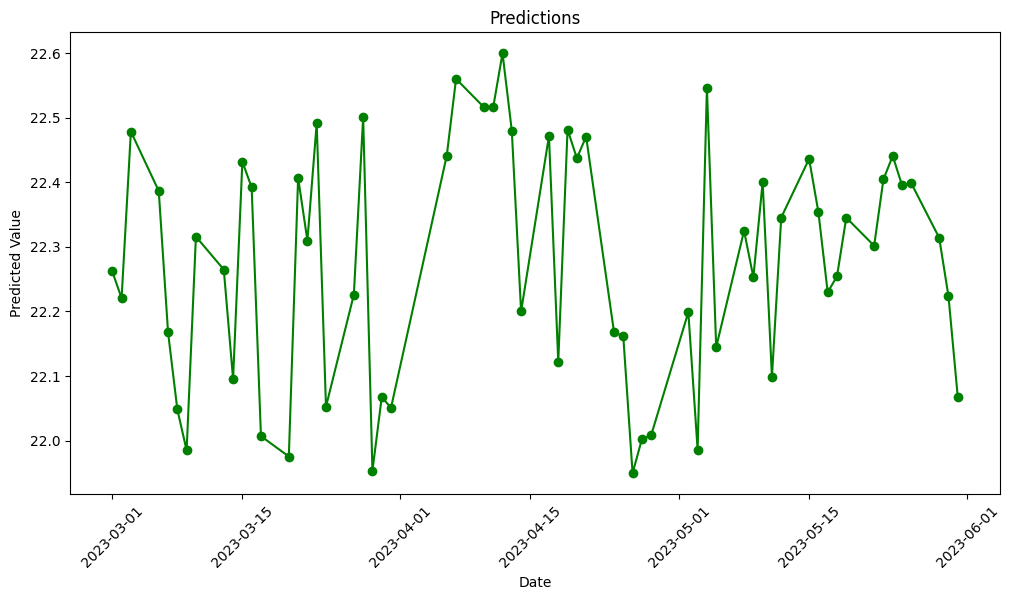

In [10]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()

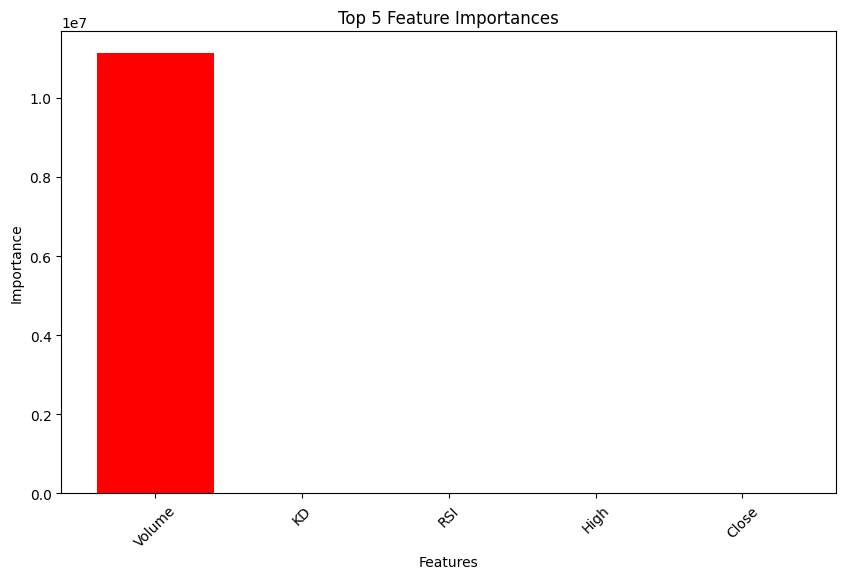

In [11]:
# 獲取支持向量（SV）的索引
support_vector_indices = model_SVR.support_

# 獲取支持向量對應的特徵
support_vectors = X.iloc[support_vector_indices]

# 計算支持向量的平均值作為特徵重要性
feature_importances = support_vectors.mean()

# 將特徵重要性排序
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# 取前N個重要特徵
top_n = 5
top_features = feature_importances_sorted.index[:top_n]
top_importances = feature_importances_sorted.values[:top_n]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


### randomforest

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime
from dateutil.relativedelta import relativedelta

# Random Forest
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(5, 100, 5)]
n_estimator_values = [i for i in range(100, 250, 50)]
max_depth_values = [i for i in range(1, 5)]
min_samples_leaf_values = [i for i in range(1, 5)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            for n_estimators in n_estimator_values:
                model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=2023)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                average_value = np.mean(y_test)
                relative_error = (mse / average_value) * 100
                if relative_error < best_relative_error:
                    best_relative_error = relative_error
                    best_params = {'ratio': ratio, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error,'%')

# 將模型命名為 model
model_RF = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              min_samples_leaf=best_params['min_samples_leaf'],
                              random_state=2023)
model_RF.fit(X, y)




最佳参数: {'ratio': 85, 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 4}
最佳相对误差: 0.002116308222042528 %


RandomForestRegressor(max_depth=4, min_samples_leaf=4, n_estimators=200,
                      random_state=2023)

In [13]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-15':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_RF = model_RF.predict(input_data)

# 印出預測結果
print(predictions_RF)

[21.69256831 21.77755083 21.94142054 21.99698253 22.32501397 22.28116824
 22.05680016 22.32501397 22.70003419 22.79868887 22.38262599 22.28116824
 22.05680016 22.62570945 22.55527317 22.66918892 22.70003419 22.33772771
 22.70003419 22.70076381 22.66918892 22.85118087 22.79868887 22.66980037
 22.74182238 22.49532201 22.62570945 22.70003419 22.45138258 22.29836261
 22.45138258 22.70076381 22.6684593  22.66980037 22.79567565 23.44355594
 23.48488032 23.21199137 22.85412492 22.79868887 23.19971096 22.93053022
 23.43490866 22.7448356  22.89873938 22.79868887 22.7448356  22.62756338
 22.62756338 22.62683376 22.55680233 22.70076381 22.74369399 22.95308501
 22.7448356  22.79868887 22.89873938 22.95308501 22.85232248 22.93053022
 22.93053022 22.85232248]


In [14]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_RF = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_RF = selected_data_RF[['Date']]

selected_data_RF['predictions_RF'] = predictions_RF

# 打印结果
print(selected_data_RF)


                          Date  predictions_RF
5265 2023-03-01 00:00:00+08:00       21.692568
5266 2023-03-02 00:00:00+08:00       21.777551
5267 2023-03-03 00:00:00+08:00       21.941421
5268 2023-03-06 00:00:00+08:00       21.996983
5269 2023-03-07 00:00:00+08:00       22.325014
...                        ...             ...
5322 2023-05-25 00:00:00+08:00       22.953085
5323 2023-05-26 00:00:00+08:00       22.852322
5324 2023-05-29 00:00:00+08:00       22.930530
5325 2023-05-30 00:00:00+08:00       22.930530
5326 2023-05-31 00:00:00+08:00       22.852322

[62 rows x 2 columns]


In [15]:
# 找到最低值和最高值的索引
min_index = selected_data_RF['predictions_RF'].idxmin()
max_index = selected_data_RF['predictions_RF'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_RF.loc[min_index, 'Date']
max_date = selected_data_RF.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_RF.loc[min_index, 'predictions_RF']
max_value = selected_data_RF.loc[max_index, 'predictions_RF']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)

最低值日期： 2023-03-01 00:00:00+08:00
最低值： 21.69256830965886
最高值日期： 2023-04-25 00:00:00+08:00
最高值： 23.484880319484127


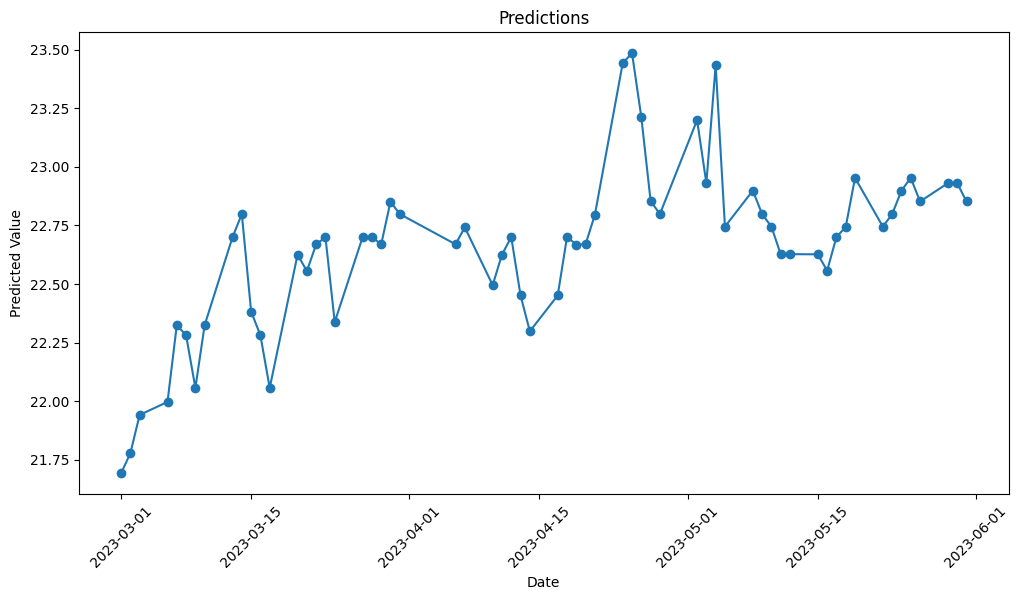

In [16]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



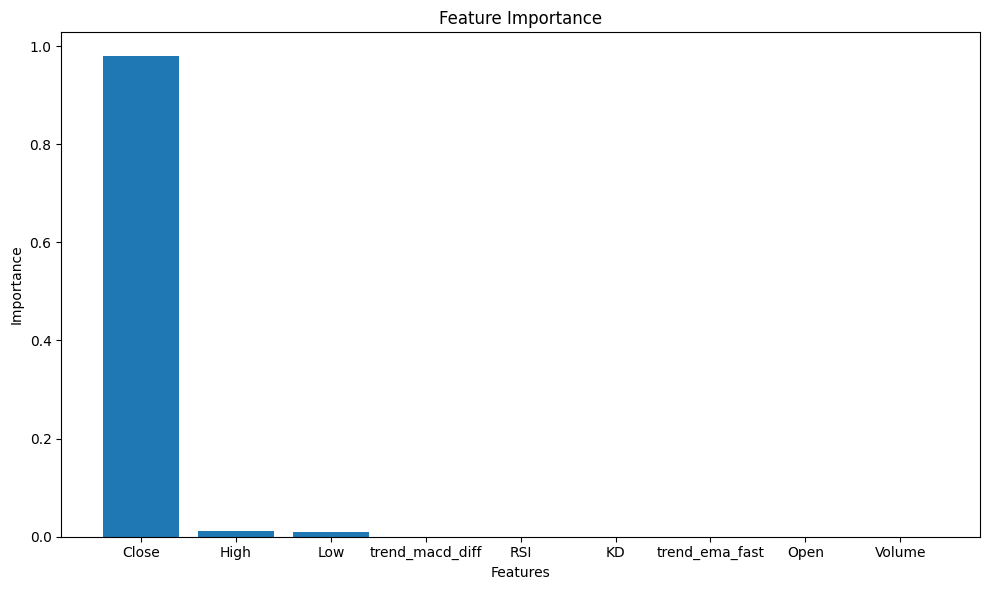

In [17]:
#看那些特徵比較重要，然後輸出前n重要的特徵

feature_importances = model_RF.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names,)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### XGBoost

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta


# XGBoost
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for max_depth in range(3, 7):
        for learning_rate in [0.1, 0.01]:
            model = xgb.XGBRegressor(max_depth=max_depth, learning_rate=learning_rate)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((max_depth, learning_rate, avg_score))
    
    # 選擇最佳參數
    best_max_depth, best_learning_rate, _ = min(scores, key=lambda x: x[2])
    
    model = xgb.XGBRegressor(max_depth=best_max_depth, learning_rate=best_learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.00001
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'max_depth': best_max_depth, 'learning_rate': best_learning_rate}

print("最佳參數:", best_params)
print("最佳相對誤差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_XG = xgb.XGBRegressor(max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'])
model_XG.fit(X, y)

最佳參數: {'ratio': 20, 'max_depth': 3, 'learning_rate': 0.01}
最佳相對誤差: 0.0 %


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_XG = model_XG.predict(input_data)

# 印出預測結果
print(predictions_XG)

[13.996691 14.074989 14.160467 14.18728  14.308734 14.308734 14.213207
 14.308734 14.308734 14.308734 14.308734 14.308734 14.213207 14.308734
 14.308734 14.308734 14.308734 14.308734 14.308734 14.308734 14.308734
 14.308734 14.308734 14.308734 14.308734 14.308734 14.308734 14.308734
 14.308734 14.308734 14.308734 14.308734 14.308734 14.308734 14.308734
 14.308734 14.308734 14.308734 14.308734 14.308734 14.308734 14.308734
 14.308734 14.308734 14.308734 14.308734 14.308734 14.308734 14.308734
 14.308734 14.308734 14.308734 14.308734 14.308734 14.308734 14.308734
 14.308734 14.308734 14.308734 14.308734 14.308734 14.308734]


In [20]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_XG = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_XG = selected_data_XG[['Date']]

selected_data_XG['predictions_XG'] = predictions_XG

# 打印结果
print(selected_data_XG)




                          Date  predictions_XG
5265 2023-03-01 00:00:00+08:00       13.996691
5266 2023-03-02 00:00:00+08:00       14.074989
5267 2023-03-03 00:00:00+08:00       14.160467
5268 2023-03-06 00:00:00+08:00       14.187280
5269 2023-03-07 00:00:00+08:00       14.308734
...                        ...             ...
5322 2023-05-25 00:00:00+08:00       14.308734
5323 2023-05-26 00:00:00+08:00       14.308734
5324 2023-05-29 00:00:00+08:00       14.308734
5325 2023-05-30 00:00:00+08:00       14.308734
5326 2023-05-31 00:00:00+08:00       14.308734

[62 rows x 2 columns]


In [21]:
# 找到最低值和最高值的索引
min_index = selected_data_XG['predictions_XG'].idxmin()
max_index = selected_data_XG['predictions_XG'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_XG.loc[min_index, 'Date']
max_date = selected_data_XG.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_XG.loc[min_index, 'predictions_XG']
max_value = selected_data_XG.loc[max_index, 'predictions_XG']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-03-01 00:00:00+08:00
最低值： 13.996691
最高值日期： 2023-03-07 00:00:00+08:00
最高值： 14.308734


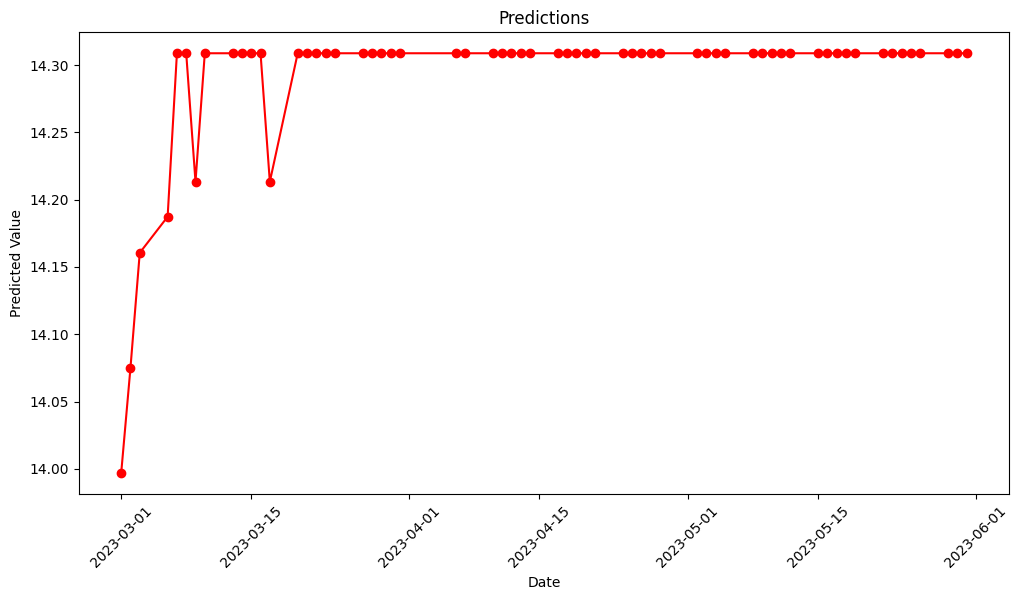

In [22]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



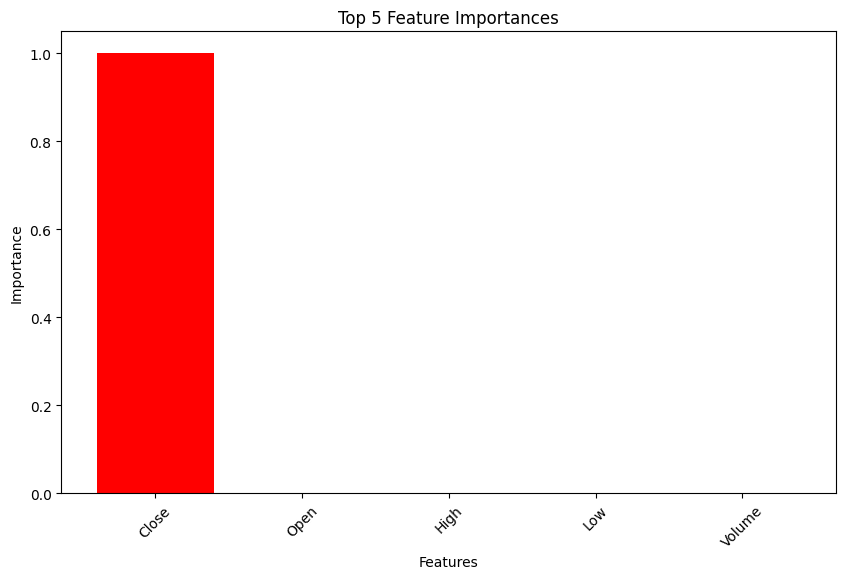

In [23]:
# 獲取特徵重要性
feature_importances = model_XG.feature_importances_

# 獲取特徵名稱
feature_names = X.columns

# 將特徵重要性與特徵名稱進行配對並排序
feature_importances_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# 取前N個重要特徵
top_n = 5
top_features = [f for f, _ in feature_importances_sorted[:top_n]]
top_importances = [imp for _, imp in feature_importances_sorted[:top_n]]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


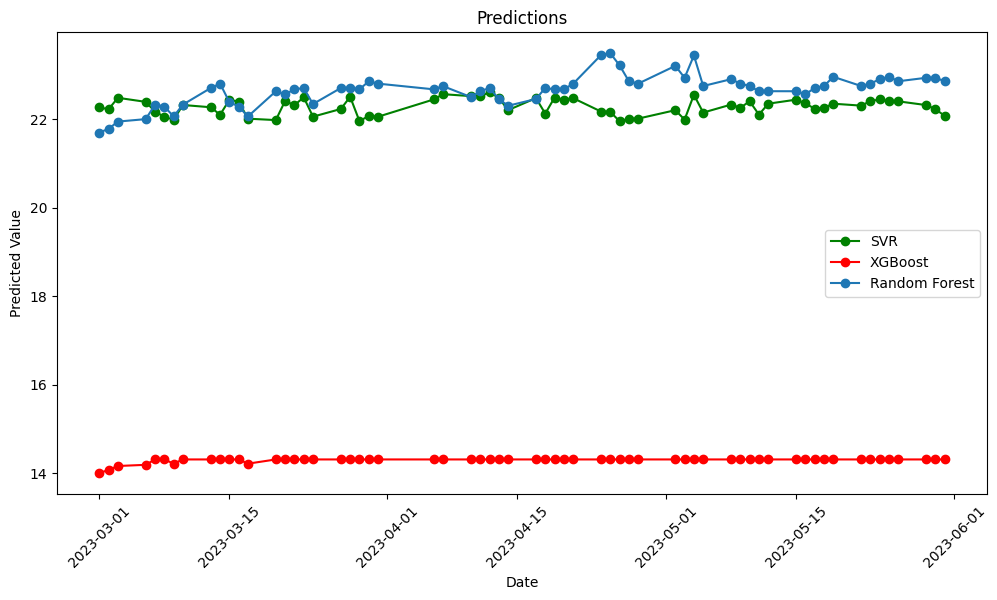

In [24]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green', label='SVR')
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red', label='XGBoost')
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o', label='Random Forest')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置图例
plt.legend()

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()
